In [417]:
import warnings
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from scipy import stats
import datetime as dt


warnings.filterwarnings('ignore')

### A: summarize the data

Below is the Count of all columns for each row. As we can see below there are a total of 1640 rows all of these rows are full and ready for further analyis


In [418]:
df = pd.read_csv('Life Expectancy Data.csv').dropna()
print(df.count())

Country                            1649
Year                               1649
Status                             1649
Life expectancy                    1649
Adult Mortality                    1649
infant deaths                      1649
Alcohol                            1649
percentage expenditure             1649
Hepatitis B                        1649
Measles                            1649
 BMI                               1649
under-five deaths                  1649
Polio                              1649
Total expenditure                  1649
Diphtheria                         1649
 HIV/AIDS                          1649
GDP                                1649
Population                         1649
 thinness  1-19 years              1649
 thinness 5-9 years                1649
Income composition of resources    1649
Schooling                          1649
dtype: int64


In [419]:
df


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [420]:

print("Amount of unique Countries")
print(len(df['Country'].unique()))

print("Amount of unique")
print(len(df['Status'].unique()))

Amount of unique Countries
133
Amount of unique
2


as we can note Country, Year, and Status are all categorical with the rest of the values being continuos. Because there are 133 unique countries, to reduce the amount of extra features added I will use a LabelEncoder such that each unique country has a number between 1 and 133. I will then do one hot encoding for status since there are only two unique answers. 

In [421]:
df = pd.get_dummies(df, columns=['Status'])
df['Status_Developed'] = df['Status_Developed'].astype(int)
df['Status_Developing'] = df['Status_Developing'].astype(int)

print(df.columns)

# Label encode 'Country'
# label_encoder = LabelEncoder()
# df['Country'] = label_encoder.fit_transform(df['Country'])

df = df.drop(columns =['Country'])

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developed',
       'Status_Developing'],
      dtype='object')


### B. Displaying statistical values

mean, std, and minimums of all colums

In [422]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,...,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,...,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891,0.146756,0.853244
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,...,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388,0.353969,0.353969
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,...,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000,0.000000,0.000000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,...,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000,0.000000,1.000000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,...,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000,0.000000,1.000000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,...,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000,0.000000,1.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,...,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000,1.000000,1.000000


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>,
        <Axes: title={'center': 'Alcohol'}>],
       [<Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>,
        <Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>],
       [<Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>,
        <Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center'

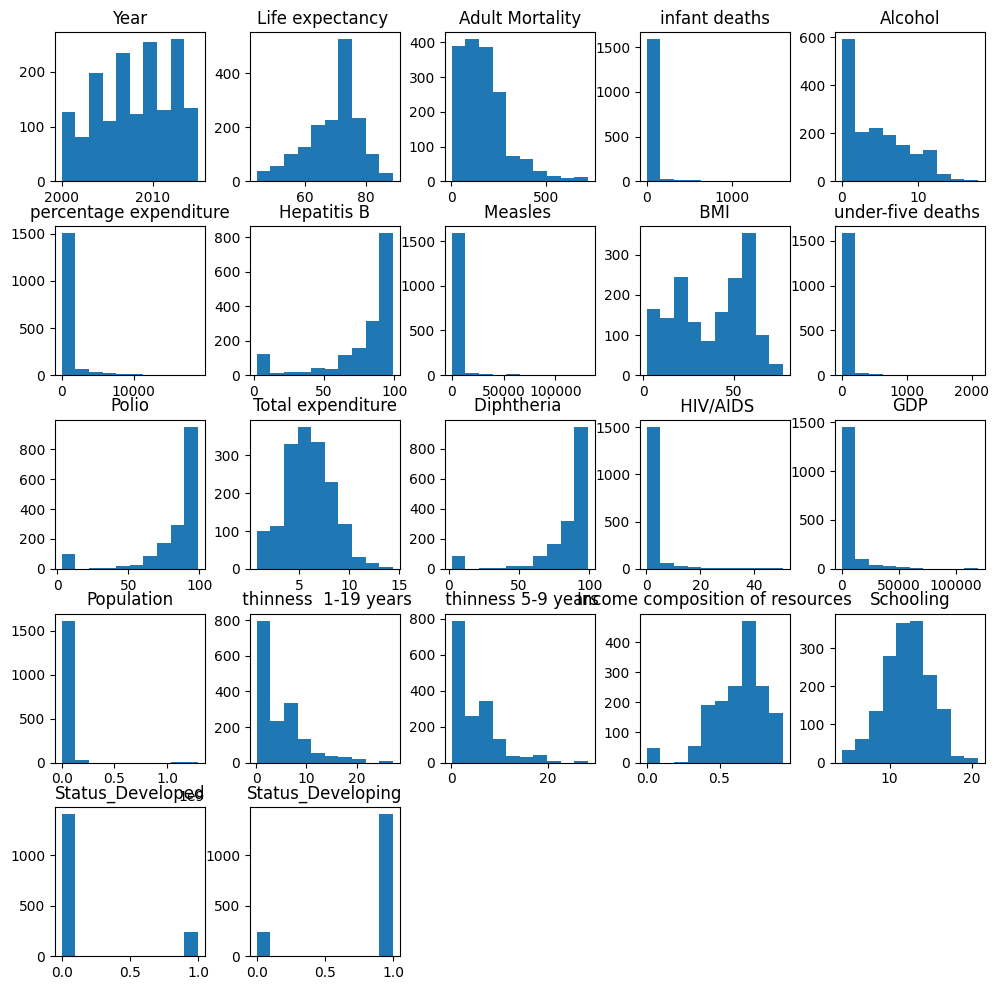

In [423]:
df.hist( grid=False, figsize=(12,12))

Observations on the data:

Alot of these values seem to be skewed rather aggresively, an example of this is in GDP where most of the countriess are populated to the left of the graph. This is also evident in the HIV/AIDS category

### C. Exploring Relationships Between Columns

Correlation between continuos columns

In [424]:
continuos_variables = df.drop(columns=['Status_Developed','Status_Developing'])

In [425]:
cols = continuos_variables.columns.tolist()
num_cols = len(cols)

results = []
for i in range(num_cols):
    for j in range(num_cols):
        # Only plot in the upper triangle (when column index j > i)
        if i < j: 
            col1 = cols[i]
            col2 = cols[j]
            stat, p_value = stats.pearsonr(continuos_variables[col1].values, continuos_variables[col2].values)

            results.append({
                'col1': col1,
                'col2': col2,
                'Statistic': stat,
                'p_value': p_value

            })
            

stats = pd.DataFrame(results)
stats

,col1,col2,Statistic,p_value
0,Year,Life expectancy,0.050771,3.925820e-02
1,Year,Adult Mortality,-0.037092,1.321713e-01
2,Year,infant deaths,0.008029,7.445727e-01
3,Year,Alcohol,-0.113365,3.932924e-06
4,Year,percentage expenditure,0.069553,4.717747e-03
...,...,...,...,...
185,thinness 1-19 years,Income composition of resources,-0.453679,1.648135e-84
186,thinness 1-19 years,Schooling,-0.491199,7.082064e-101
187,thinness 5-9 years,Income composition of resources,-0.438484,1.927961e-78
188,thinness 5-9 years,Schooling,-0.472482,1.861191e-92


Because of the immense amount of 

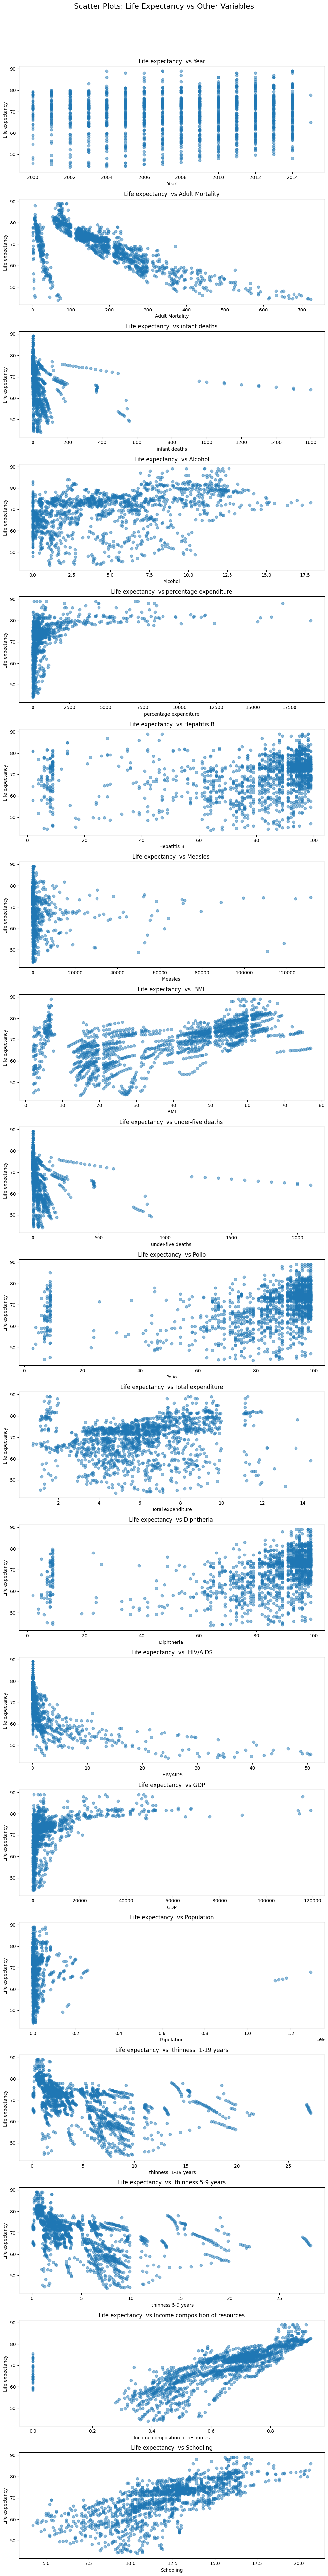

In [426]:
life_expectancy_col = 'Life expectancy '
other_cols = [col for col in continuos_variables.columns if col != life_expectancy_col]

num_cols = len(other_cols)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, num_cols*4))

for i, col in enumerate(other_cols):
    axes[i].scatter(continuos_variables[col].values, continuos_variables[life_expectancy_col].values, alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(life_expectancy_col)
    axes[i].set_title(f'{life_expectancy_col} vs {col}')

plt.tight_layout()
plt.suptitle('Scatter Plots: Life Expectancy vs Other Variables', fontsize=16, y=1.02)
plt.show()


Discussion:


From observing both the scatter plots and the pearson correlation between all columns of the dataframe. Since we are predicting life ecpectancy, we will focus on the scatter plots between Life expectancy and the rest of the variables. As we can note Schooling and income composition of resources are looking to be positvely and strongly skewed. Life expectancy and Adult mortality also show a strong negative correlated 

### D. Select 25% of the data for testing

Splitting the data into 75-25 split we check the validity by checking the similarity between the train and test data

In [427]:
X = df.drop(columns=['Life expectancy '], axis=1).values
y = df['Life expectancy '].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

                                                    
print("Compating means of splits")
print(f"X_train:  {np.mean(X_train)}")
print(f"X_test:   {np.mean(X_test)}")

print(f"y_train:  {np.mean(y_train)}")
print(f"y_test:   {np.mean(y_test)}")

# Scaling values
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


Compating means of splits
X_train:  670005.3890188915
X_test:   783052.3145569285
y_train:  69.3864077669903
y_test:   69.05060532687651


### E. Training linear regression models

closed form using the normal equation, cross validation using K folds 

In [428]:
def normal_equation_Kfolds(X):

    kf = KFold(n_splits=3)
    mse_scores = []

    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    for train_index, val_index in kf.split(X_b):
        X_train_fold, X_val_fold = X_b[train_index], X_b[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        theta_best = np.linalg.pinv(X_train_fold.T.dot(X_train_fold)).dot(X_train_fold.T).dot(y_train_fold)
        y_val_pred = X_val_fold.dot(theta_best)

        mse = mean_squared_error(y_val_fold, y_val_pred)
        mse_scores.append(mse)


    mean_mse = np.mean(mse_scores)

    print(f'Mean 3-Fold Cross-Validation MSE (Normal Equation): {mean_mse:.3f}')


normal_equation_Kfolds(X)

Mean 3-Fold Cross-Validation MSE (Normal Equation): 19.080


SGD regressor using different regulation techiques

In [429]:

def test_regularization(scaled_X_train, y_train):
        penalities = [None, 'l1', 'l2', 'elasticnet']
        penalty_names = {
                'l1': 'lasso',
                'l2' : 'ridge'
        }

        print("Testing Different Penalty Types")
        for penalty in penalities:
                # assume CV will automatically split the training set into train and validation
                sgd = SGDRegressor(max_iter=1000, alpha=0.3, penalty=penalty, random_state=99, early_stopping=True)
                cv_scores = cross_val_score(sgd, scaled_X_train, y_train, cv=3, scoring='neg_mean_squared_error')
                average_mse  = -cv_scores.mean()
                        
                penalty_display = penalty_names.get(penalty, penalty)
                print(f'{penalty_display}: {average_mse: .3f}')


test_regularization(scaled_X_train, y_train)


Testing Different Penalty Types
None:  13.397
lasso:  13.886
ridge:  14.268
elasticnet:  14.050


Discussion:

We notice that all of the regularization converge to a similar result, with None suprisingly perforing better

Other Hyper Parameters
 - learning rate
 - batch size 
 - iteration to mse

In [430]:
def test_learning_rates(scaled_X_train, y_train):
    learning_rates = ['constant', 'optimal', 'invscaling', 'adaptive']

    print("Testing Learning rate")
    for rate in learning_rates:
        sgd = SGDRegressor(max_iter=1000, penalty=None, random_state=99, learning_rate=rate, alpha=.04, early_stopping=True)
        cv_scores = cross_val_score(sgd, scaled_X_train, y_train, cv=3, scoring='neg_mean_squared_error')
        average_mse  = -cv_scores.mean()
            
        print(f'{rate}: {average_mse:.3f}')


test_learning_rates(scaled_X_train, y_train)

Testing Learning rate
constant: 9790816.434
optimal: 91731133438882004992.000
invscaling: 13.397
adaptive: 10841.938


Discussion:


We notice that the optimal learning rate is performing much worse than the others. This could be a result of how the scaling is performed, otherwise invscaling and adaptive seem to be performing the best

In [431]:
# Further split in to validation set
X_train , X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=99)


scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)

In [432]:

def test_batch_size(scaled_X_train, y_train, scaled_X_val, y_val):
    batch_sizes = [4, 16, 32, 64, 128, 256]
    learning_rate = 'adaptive'
    N = len(scaled_X_train)

    for batch_size in batch_sizes:

        model = SGDRegressor(max_iter=1000, learning_rate=learning_rate, eta0=0.001, alpha=.05, early_stopping=False)

        for epoch in range(10):

            shuffled_indices = np.random.permutation(N)
            scaled_X_train_shuffled = scaled_X_train[shuffled_indices]
            y_train_shuffled = y_train[shuffled_indices]

            for i in range(0, N, batch_size):
                start_index = i
                end_index = min(start_index + batch_size, N) 
                X_batch = scaled_X_train_shuffled[start_index:end_index]
                y_batch = y_train_shuffled[start_index:end_index]
                model.partial_fit(X_batch, y_batch)

        predictions = model.predict(scaled_X_val)
        mse = mean_squared_error(y_val, predictions)
        print(f'Batch Size: {batch_size}, Learning Rate: {learning_rate}, MSE: {mse:.4f}')


test_batch_size(scaled_X_train, y_train, scaled_X_val, y_val)

Batch Size: 4, Learning Rate: adaptive, MSE: 44.8594
Batch Size: 16, Learning Rate: adaptive, MSE: 44.2752
Batch Size: 32, Learning Rate: adaptive, MSE: 44.8940
Batch Size: 64, Learning Rate: adaptive, MSE: 45.9740
Batch Size: 128, Learning Rate: adaptive, MSE: 44.4172
Batch Size: 256, Learning Rate: adaptive, MSE: 44.7743


Discussion:


From the given batch sizes it seems that the results are converging to similar parameters resulting in similar MSE scores. 

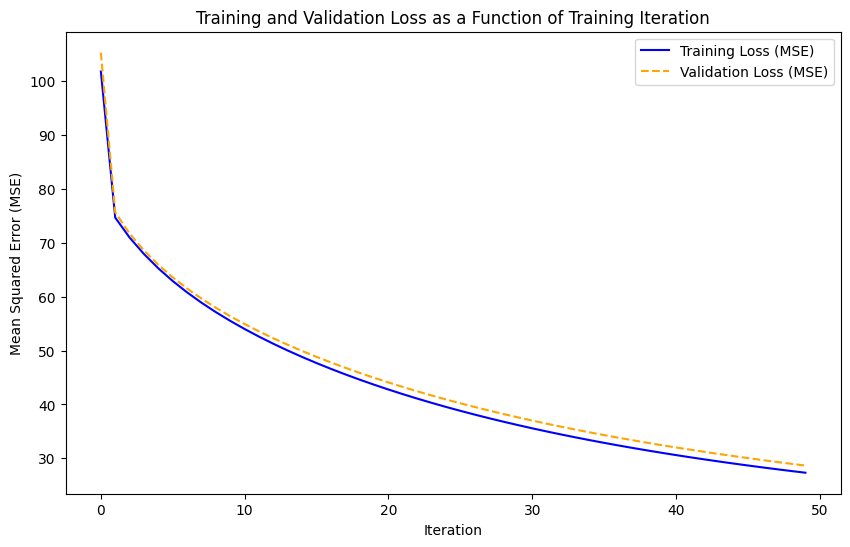

In [433]:


def test_train_val_error(scaled_X_train, y_train, scaled_X_val, y_val):
    sgd_reg = SGDRegressor(warm_start=True, tol=None,
                        penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

    n_epochs = 50
    train_errors, val_errors = [], []
    for epoch in range(n_epochs):
        sgd_reg.partial_fit(scaled_X_train, y_train)
        y_train_pred = sgd_reg.predict(scaled_X_train)
        y_val_pred = sgd_reg.predict(scaled_X_val)
        train_errors.append(mean_squared_error(y_train, y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))

    best_epoch = np.argmin(val_errors)
    best_val_rmse = np.sqrt(val_errors[best_epoch])

    # Plot the training and validation MSE as a function of training iterations
    plt.figure(figsize=(10, 6))
    plt.plot(train_errors, label='Training Loss (MSE)', color='blue')
    plt.plot(val_errors, label='Validation Loss (MSE)', color='orange', linestyle='--')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Training and Validation Loss as a Function of Training Iteration')
    plt.legend()
    plt.show()


test_train_val_error(scaled_X_train, y_train, scaled_X_val, y_val)



### F. Polynomial features

In [444]:

X = df.drop('Life expectancy ', axis=1).values
y = df['Life expectancy '].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('scaler', MinMaxScaler()), ])

scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.transform(X_test)



In [445]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
normal_equation_Kfolds(X_poly)

Mean 3-Fold Cross-Validation MSE (Normal Equation): 1235420.481


In [446]:

test_regularization(scaled_X_train, y_train)

Testing Different Penalty Types
None:  12.783
lasso:  26.214
ridge:  46.993
elasticnet:  45.839


Discussion:

We are noting incredibly high MSE, this is the result of the model overfitting and performing worse 

In [447]:

test_learning_rates(scaled_X_train, y_train)



Testing Learning rate
constant: 11.979
optimal: 9024169220178938167296.000
invscaling: 12.783
adaptive: 10.266


Discussion:

We notice very strange begavior of the optimal learning rate, resulting in the model overfitting, and diverging from the true local minima

In [449]:

X_train , X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=99)

pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('scaler', MinMaxScaler()), ])

scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_val = pipeline.transform(X_val)


In [450]:

test_batch_size(scaled_X_train, y_train, scaled_X_val, y_val)

Batch Size: 4, Learning Rate: adaptive, MSE: 27.5128
Batch Size: 16, Learning Rate: adaptive, MSE: 27.3162
Batch Size: 32, Learning Rate: adaptive, MSE: 27.3366
Batch Size: 64, Learning Rate: adaptive, MSE: 27.4105
Batch Size: 128, Learning Rate: adaptive, MSE: 27.1739
Batch Size: 256, Learning Rate: adaptive, MSE: 27.2104


Discussion: We notice that the Mean Squared Error starts to overfit and diverge from the true values. This results in incredibly poor performance 

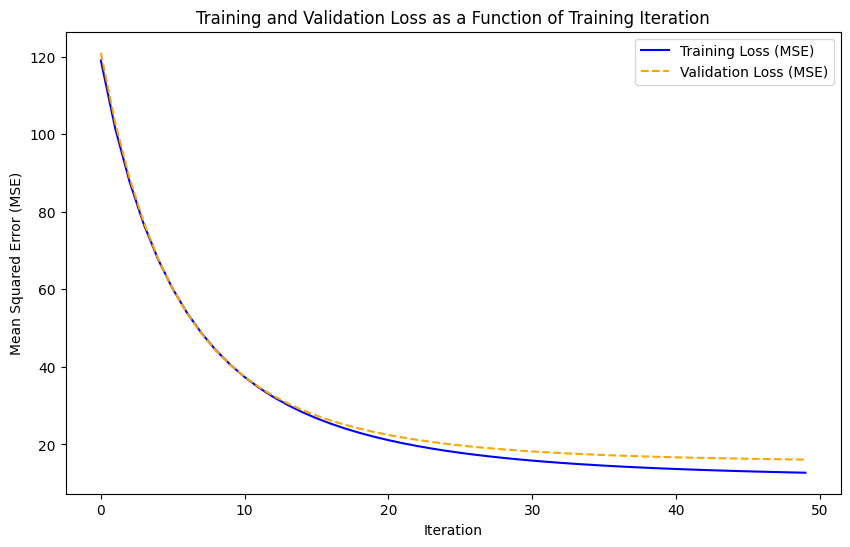

In [451]:

test_train_val_error(scaled_X_train, y_train, scaled_X_val, y_val)


### G. Predicting test values

choosing two the best polynomaial and std SGD model we compare on the test

In [452]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

poly = Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('scaler', MinMaxScaler()), ])

scaled_X_train_poly = poly.fit_transform(X_train)
scaled_X_test_poly = poly.transform(X_test)

scaler = MinMaxScaler()
scaled_X_train_st = scaler.fit_transform(X_train)
scaled_X_test_st = scaler.transform(X_test)




In [453]:
sgd = SGDRegressor(max_iter=1000, penalty='l2', random_state=99, learning_rate='adaptive')
sgd.fit(scaled_X_train_st, y_train)
pred = sgd.predict(scaled_X_test_st)
mse = mean_squared_error(y_test, pred)

print("Non Polynomial SGD Regressor")
print(f"MSE: {mse}")

Non Polynomial SGD Regressor
MSE: 14.896963474812411


In [454]:
sgd = SGDRegressor(max_iter=1000, penalty='l2', random_state=99, learning_rate='adaptive')
sgd.fit(scaled_X_train_poly, y_train)
pred = sgd.predict(scaled_X_test_poly)
mse = mean_squared_error(y_test, pred)

print("Polynomial SGD Regressor")
print(f"MSE: {mse}")

Polynomial SGD Regressor
MSE: 9.63712638315904


Observations:
We observed that the Polynomial SGD Regressor performed better overall, with min-max scaling playing a crucial role in significantly reducing the impact of outliers. This scaling contributed to improved results. However, it's important to note that the model should be stopped earlier during training, as the validation MSE begins to increase while the training MSE continues to decrease, indicating potential overfitting. Further improvement could be achieved by comparing the performance of different scaling methods.